# ESCUELA POLITÉCNICA NACIONAL

## MÉTODOS NUMÉRICOS

### TAREA 7

David Alejandro Puga Novoa - GR1CC - 27/11/2024

##### Series de Taylor

Empezaremos creando una función para realizar las series de Taylor:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable
import sympy as sym

def taylor_approx(fcn: Callable[[float], float], x0: float, n: int) -> sym.Symbol:
    x = sym.symbols("x")
    f = sym.sympify(fcn(x))
    taylor: sym.Symbol = 0
    for i in range(n + 1):
        term = f.diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0) ** i
        taylor += term
    return taylor

Utilizaremos las series de Taylor hasta $n = 3$, se mostrará el resultado de la función "taylor_approx" utilizando como parámetros la función original, $x_0$ y el orden del polinomio.

Quedando asi la función (1):

In [17]:
func = lambda x : 1 / (25*x*x + 1)
taylor_pol = taylor_approx(func, 0, 3)
taylor_pol

1 - 25*x**2

Y como necesitamos ver graficamente la función, creamos una función para este cometido:

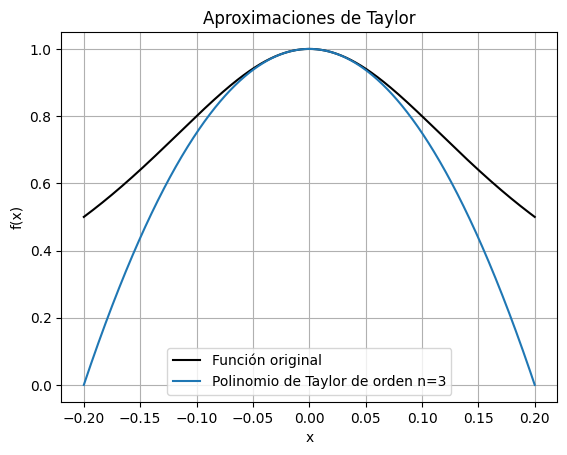

In [18]:
def plot_taylor_approx(fcn: Callable[[float], float], taylor_poly, n: int, x_range: tuple):
    x = sym.symbols("x")
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    
    original_fcn = sym.lambdify(x, fcn(x), "numpy")
    y_vals = original_fcn(x_vals)
    plt.plot(x_vals, y_vals, label=f"Función original", color='black')
    
    taylor_fcn = sym.lambdify(x, taylor_poly, "numpy")
        
    taylor_y_vals = taylor_fcn(x_vals)
    if np.isscalar(taylor_y_vals):
        taylor_y_vals = np.full_like(x_vals, taylor_y_vals)
        
    plt.plot(x_vals, taylor_y_vals, label=f"Polinomio de Taylor de orden n={n}")
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Aproximaciones de Taylor")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_taylor_approx(func, taylor_pol, 3, (-0.2, 0.2))

Ahora para la función (2) con lambda:

In [20]:
func2 = lambda x : sym.atan(x)
taylor_pol = taylor_approx(func2, 1, 3)
taylor_pol

x/2 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4

Y su función graficamente: 

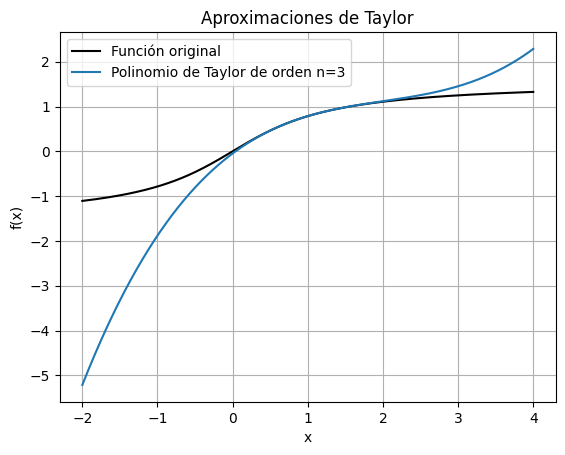

In [22]:
plot_taylor_approx(func2, taylor_pol, 3, (-2, 4))

##### Polinomio de Lagrange

Empezaremos creando una función para realizar los polinomios de lagrange:

In [24]:
from scipy.interpolate import lagrange

Es necesario más de un punto si queremos que funcione por ello tomaremos 3 puntos incluyendo el ya asignado como dato.

Calcula el polinomio de lagrange para la primera función (Dos puntos extra agregados para que se asemeje a la función original)

In [39]:
X = [-0.4, 0, 0.4]
Y = [0.2, 1, 0.2]

polynomial = lagrange(X, Y)
print(polynomial)

    2
-5 x + 1


Ahora seria crear la función para graficar la función original y la función resultante del polinomio de lagangre:

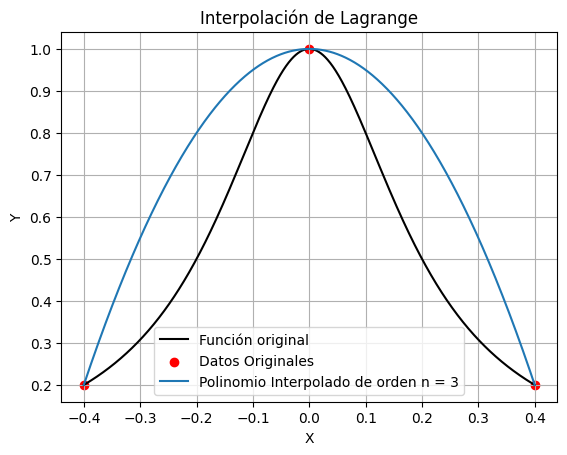

In [42]:
def plot_lagrange(fcn : Callable[[float], float], pol, n: int, x_range: tuple, X, Y):
    x = sym.symbols("x")
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    
    original_fcn = sym.lambdify(x, fcn(x), "numpy")
    y_vals = original_fcn(x_vals)
    plt.plot(x_vals, y_vals, label=f"Función original", color='black')
    
    x_values = np.linspace(x_range[0], x_range[1], 1000)
    y_values = polynomial(x_values)

    plt.scatter(X, Y, color='red', label='Datos Originales')
    plt.plot(x_values, y_values, label=f'Polinomio Interpolado de orden n = {n}')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Interpolación de Lagrange')
    plt.legend()
    plt.grid(True)
    plt.show
    
plot_lagrange(func, polynomial, 3, (-0.4, 0.4), X, Y)

Y ahora para la función (2) representamos algunos valores o pares ordenados de la propia función original para usar el polinomio de lagrange:

         2
-0.2315 x + 1.017 x


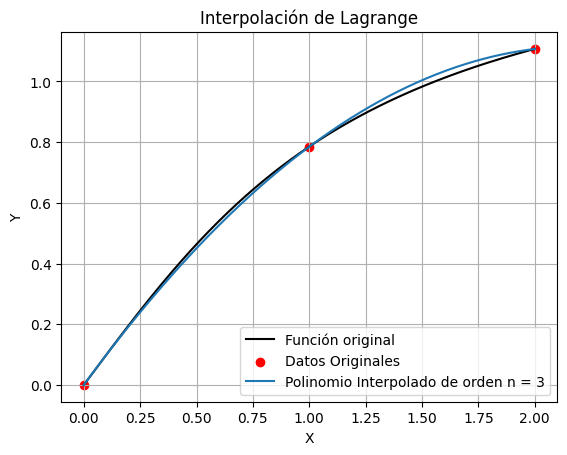

In [48]:
X = [0, 1, 2]
Y = [0, 0.785, 1.107]

polynomial = lagrange(X, Y)
print(polynomial)

plot_lagrange(func2, polynomial, 3, (0, 2), X, Y)

### CONJUNTO DE EJERCICIOS

#### Ejercicio 3: Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:

In [6]:
import sympy as sym
from IPython.display import display

# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key = lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    # alpha = # completar
    alpha = [0] * (n + 1)
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3
    alpha[-1] = - 3 / h[n - 1] * (ys[n] - ys[n - 1])
    
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

In [7]:
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

#### Ejercicio 4: Usando la función anterior, encuentre el spline cúbico para

- $xs = [1, 2, 3]$
- $ys = [2, 3, 5]$

In [8]:
xs = [1, 2, 3]
ys = [2, 3, 5]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

______


0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0